In [1]:
import pandas as pd
df = pd.read_csv("dm.csv")

In [2]:
df.head(2)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127


In [3]:
df.isnull().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
Cust_Id          0
dtype: int64

In [4]:
df['History'].fillna("new_cust",inplace=True)

In [5]:
df_dummy = pd.get_dummies(df,drop_first=True)

In [6]:
df_dummy.head(2)

,Salary,Children,Catalogs,AmountSpent,Cust_Id,Age_Old,Age_Young,Gender_Male,OwnHome_Rent,Married_Single,Location_Far,History_Low,History_Medium,History_new_cust
0,47500,0,6,755,247,1,0,0,0,1,1,0,0,0
1,63600,0,6,1318,127,0,0,1,1,1,0,0,0,0


In [7]:
X = df_dummy.drop(['Cust_Id','AmountSpent'],axis=1).values
y = df_dummy['AmountSpent'].values

In [8]:
from sklearn import tree

In [9]:
reg = tree.DecisionTreeRegressor(max_depth=3)

In [10]:
reg = reg.fit(X,y)

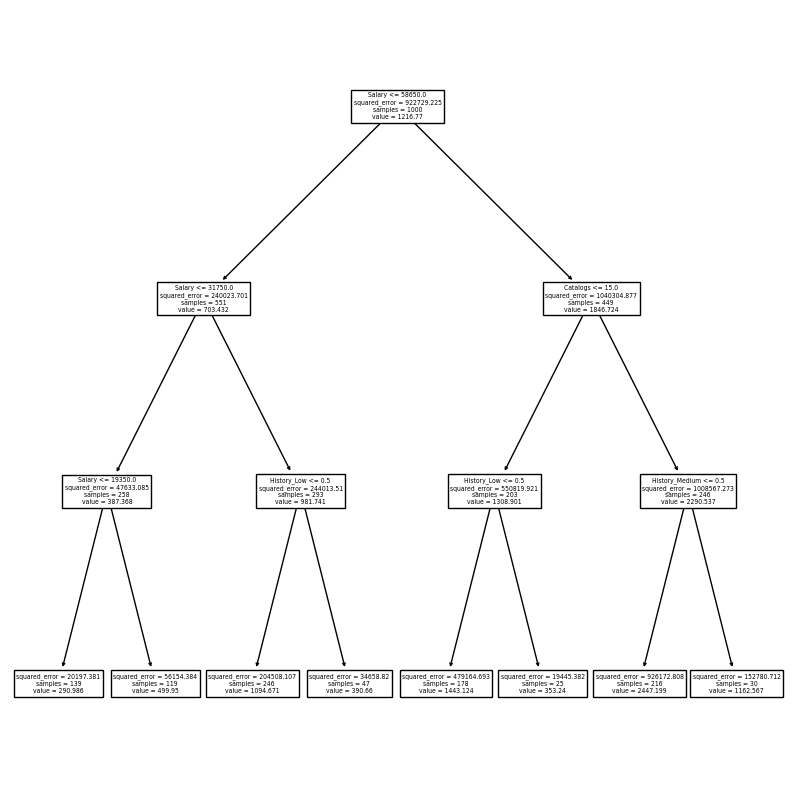

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(reg,
               feature_names=df_dummy.drop(['Cust_Id','AmountSpent'],axis=1).columns)
plt.show()

In [12]:
#### How to decide the depth of tree/pruning (K Fold CV)

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
param_grid = {"max_depth":[2,3,4,5,6,7,8]}

In [15]:
reg = GridSearchCV(tree.DecisionTreeRegressor(),param_grid=param_grid,cv=5)
reg = reg.fit(X,y)

In [16]:
reg.best_estimator_

DecisionTreeRegressor(max_depth=8)